In [1]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"diamonds.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [5]:
df.drop(columns = "clarity")

,Unnamed: 0,carat,cut,color,depth,table,price,x,y,z
0,1,0.23,Ideal,E,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
df = df.drop(columns = {"color","cut","clarity"})

In [7]:
df

,Unnamed: 0,carat,depth,table,price,x,y,z
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,53936,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,61.0,58.0,2757,6.15,6.12,3.74


<AxesSubplot:>

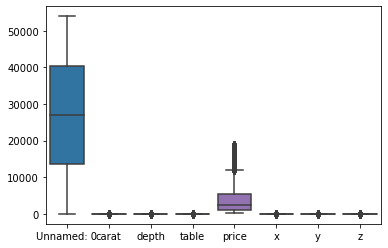

In [8]:
import seaborn as sns
sns.boxplot(data=df)

In [9]:
for i in df:                  # i = column name 
    if df[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = df[i].quantile(0.25)  # for 1 column compute q1
        q3 = df[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        df[i].clip(lower=ll,upper=ul,inplace=True)

<AxesSubplot:>

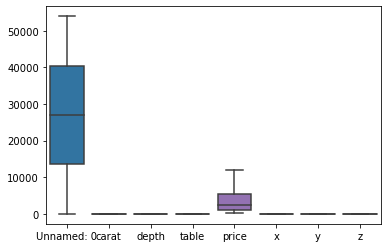

In [10]:
import seaborn as sns
sns.boxplot(data=df)

In [11]:
X = df.drop('price', axis= 1)
y = df[['price']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7 ,random_state=134)

In [12]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,price,Unnamed: 0,carat,depth,table,x,y,z
16493,6589.000,16494,1.11,63.00,56.0,6.62,6.49,4.15
35965,476.000,35966,0.25,64.75,58.0,3.95,3.97,2.57
26985,11885.625,26986,2.00,60.10,61.0,8.14,8.06,4.87
11448,5006.000,11449,1.01,61.30,59.0,6.48,6.44,3.96
34758,876.000,34759,0.41,61.40,60.0,4.78,4.73,2.92


In [13]:
Correlation = train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,price,Unnamed: 0,carat,depth,table,x,y,z
price,1.000000,-0.356236,0.936532,-0.009887,0.137016,0.911838,0.913376,0.904322
Unnamed: 0,-0.356236,1.000000,-0.392959,-0.036696,-0.103218,-0.407183,-0.407713,-0.408855
carat,0.936532,-0.392959,1.000000,0.021476,0.186099,0.981981,0.981258,0.976973
depth,-0.009887,-0.036696,0.021476,1.000000,-0.298345,-0.028815,-0.031346,0.089709
table,0.137016,-0.103218,0.186099,-0.298345,1.000000,0.196409,0.190229,0.155836
x,0.911838,-0.407183,0.981981,-0.028815,0.196409,1.000000,0.998178,0.987662
y,0.913376,-0.407713,0.981258,-0.031346,0.190229,0.998178,1.000000,0.987303
z,0.904322,-0.408855,0.976973,0.089709,0.155836,0.987662,0.987303,1.000000


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector as sfs

lreg = LinearRegression()
Model = sfs(lreg, n_features_to_select = 5, direction='forward', scoring='r2')
Model.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5,
                          scoring='r2')

In [15]:
Model.feature_names_in_

array(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z'],
      dtype=object)

In [16]:
Model.get_feature_names_out()

array(['carat', 'depth', 'table', 'x', 'z'], dtype=object)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
X_train = X_train.loc[:,['carat', 'depth', 'table', 'x', 'z']]
X_train.head()

,carat,depth,table,x,z
16493,1.11,63.00,56.0,6.62,4.15
35965,0.25,64.75,58.0,3.95,2.57
26985,2.00,60.10,61.0,8.14,4.87
11448,1.01,61.30,59.0,6.48,3.96
34758,0.41,61.40,60.0,4.78,2.92


In [19]:
train = pd.concat([X_train,y_train], axis=1)
train.head()

,carat,depth,table,x,z,price
16493,1.11,63.00,56.0,6.62,4.15,6589.000
35965,0.25,64.75,58.0,3.95,2.57,476.000
26985,2.00,60.10,61.0,8.14,4.87,11885.625
11448,1.01,61.30,59.0,6.48,3.96,5006.000
34758,0.41,61.40,60.0,4.78,2.92,876.000


In [20]:
Model3 = LinearRegression()
Model3.fit(X_train,y_train)

LinearRegression()

In [21]:
np.round(Model3.intercept_,3)

array([16578.574])

In [22]:
np.round(Model3.coef_,4)

array([[9221.3805, -166.726 ,  -85.1755, -898.3081,   51.7266]])

In [23]:
Model3.feature_names_in_

array(['carat', 'depth', 'table', 'x', 'z'], dtype=object)

In [25]:
import numpy as np
train['fitted_value'] = np.round(Model3.predict(X_train),2)
train['Residual'] = np.round(train.price - train.fitted_value,2)
train.head()

,carat,depth,table,x,z,price,fitted_value,Residual
16493,1.11,63.00,56.0,6.62,4.15,6589.000,5808.61,780.39
35965,0.25,64.75,58.0,3.95,2.57,476.000,-267.15,743.15
26985,2.00,60.10,61.0,8.14,4.87,11885.625,12745.08,-859.46
11448,1.01,61.30,59.0,6.48,3.96,5006.000,5030.31,-24.31
34758,0.41,61.40,60.0,4.78,2.92,876.000,868.96,7.04


In [27]:
from sklearn.metrics import r2_score
r2 = r2_score(train.price,train.fitted_value)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  88.0


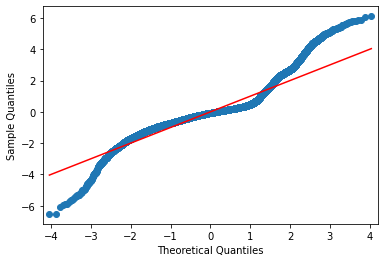

In [29]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(train['Residual'], fit=True, line='s') # s indicate standardized line
plt.show()

In [31]:
X_test = X_test.loc[:,['carat', 'depth', 'table', 'x', 'z']]
X_test.head()

,carat,depth,table,x,z
20061,0.31,63.0,57.0,4.28,2.71
30051,0.41,59.1,58.0,4.83,2.87
15257,1.01,62.7,60.0,6.27,3.95
34649,0.31,62.0,55.0,4.37,2.70
34453,0.32,62.2,57.0,4.37,2.71


In [32]:
test = pd.concat([X_test,y_test], axis=1)
test.head()

,carat,depth,table,x,z,price
20061,0.31,63.0,57.0,4.28,2.71,625.0
30051,0.41,59.1,58.0,4.83,2.87,719.0
15257,1.01,62.7,60.0,6.27,3.95,6126.0
34649,0.31,62.0,55.0,4.37,2.70,872.0
34453,0.32,62.2,57.0,4.37,2.71,864.0


In [35]:
import numpy as np
test['Prediction'] = np.round(Model3.predict(X_test),2)
test['Error / Residual'] = np.round(test.price - test.Prediction,2)
test.head()

,carat,depth,table,x,z,price,Prediction,Error / Residual
20061,0.31,63.0,57.0,4.28,2.71,625.0,373.88,251.12
30051,0.41,59.1,58.0,4.83,2.87,719.0,1375.28,-656.28
15257,1.01,62.7,60.0,6.27,3.95,6126.0,4899.85,1226.15
34649,0.31,62.0,55.0,4.37,2.70,872.0,629.59,242.41
34453,0.32,62.2,57.0,4.37,2.71,864.0,518.63,345.37


In [37]:
from sklearn.metrics import r2_score
r2 = r2_score(train.price,train.fitted_value)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  88.0
